In [45]:
import pandas as pd

In [46]:
countries = pd.read_csv('countries.csv')

In [47]:
countries

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,Afghanistan,647500,47.02,NaN,20.75,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,...,0.0,0.000000e+00,29928987,NaN,NaN,NaN,33100.0,15000.0,6.75,NaN
1,Albania,28748,15.08,-5.040000e+08,5.12,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,...,2000.0,1.855000e+08,3563112,NaN,447.0,1.206000e+09,255000.0,1100000.0,2.04,14.8
2,Algeria,2381740,17.13,1.190000e+10,4.60,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.120000e+11,...,1200000.0,1.187000e+10,32531853,37.4,3973.0,4.355000e+10,2199600.0,1447310.0,1.92,25.4
3,American Samoa,199,23.13,NaN,3.33,NaN,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,...,0.0,NaN,57881,NaN,NaN,NaN,15000.0,2377.0,3.25,6.0
4,Andorra,468,9.00,NaN,6.07,NaN,NaN,NaN,5.800000e+07,1.900000e+09,...,NaN,NaN,70549,NaN,NaN,NaN,35000.0,23500.0,1.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,West Bank,5860,32.37,NaN,3.99,1.080000e+08,NaN,NaN,2.050000e+08,1.800000e+09,...,NaN,NaN,2385615,NaN,NaN,NaN,301600.0,480000.0,4.40,27.2
227,Western Sahara,266000,NaN,NaN,NaN,NaN,8.370000e+07,9.000000e+07,NaN,NaN,...,0.0,NaN,273008,NaN,NaN,NaN,NaN,0.0,NaN,NaN
228,Yemen,527970,43.07,3.699000e+08,8.53,5.400000e+09,2.827000e+09,3.040000e+09,4.468000e+09,1.625000e+10,...,417500.0,4.000000e+09,20727063,46.4,NaN,5.300000e+09,542200.0,411100.0,6.67,35.0
229,Zambia,752614,41.38,-1.814000e+08,20.23,5.353000e+09,5.345000e+09,8.167000e+09,1.548000e+09,9.409000e+09,...,0.0,NaN,11261795,127.5,2173.0,3.450000e+08,88400.0,241000.0,5.47,50.0


In [43]:
# Data Cleansing

In [48]:
# Checking for missing values in labor force column
missing_labor_force = countries["Labor force"].isna().sum()
print("Missing values in Labor force column:", missing_labor_force)

# Checking for missing values in Unemployment rate column
missing_unemployement_rate = countries["Unemployment rate(%)"].isna().sum()
print("Missing values in Unemployment rate column:", missing_unemployement_rate)

# Checking for missing values in Population column
missing_population = countries["PopulationUnemployment rate(%)"].isna().sum()
print("Missing values in Unemployment rate column:", missing_unemployement_rate)

Missing values in Labor force column: 19
Missing values in Unemployment rate column: 41
Missing values in Population column: 0


In [57]:
# Removing rows with missing values in Labor force and Unemployment rate columns
countries_clean = countries.dropna(subset=['Labor force', 'Unemployment rate(%)'])

# Aligning population values with non-missing values in Labor force and Unemployment rate columns
population_aligned = countries_clean.loc[:, 'Population']

# Verifing if there are any missing values left
missing_values = countries_clean[['Labor force', 'Unemployment rate(%)']].isna().any(axis=1)

# Counting the number of rows with missing values
num_missing = sum(missing_values)

In [60]:
# verifying for missing values in labor force column
missing_labor_force = countries_clean["Labor force"].isna().sum()
print("Missing values in Labor force column:", missing_labor_force)

# verifying for missing values in Unemployment rate column
missing_unemployement_rate = countries_clean["Unemployment rate(%)"].isna().sum()
print("Missing values in Unemployment rate column:", missing_unemployement_rate)

Missing values in Labor force column: 0
Missing values in Unemployment rate column: 0


In [61]:
# Selecting only the Labor force, Unemployment rate, and Population columns
labor_unemployment_population = countries_clean[['Labor force', 'Unemployment rate(%)', 'Population']]

# Display the dataset
print(labor_unemployment_population)

     Labor force  Unemployment rate(%)  Population
1      1090000.0                  14.8     3563112
2      9910000.0                  25.4    32531853
3        14000.0                   6.0       57881
4        33000.0                   0.0       70549
6         6049.0                   8.0       13254
..           ...                   ...         ...
224      48900.0                   9.3      108708
226     364000.0                  27.2     2385615
228    5980000.0                  35.0    20727063
229    4630000.0                  50.0    11261795
230    4230000.0                  70.0    12746990

[182 rows x 3 columns]


In [ ]:
# Calculating Labor force rate

In [67]:
import pandas as pd

countries_clean['Labor force rate'] = (countries_clean['Labor force'] / countries_clean['Population']) * 100

C:\Users\admin\AppData\Local\Temp\ipykernel_9636\1490791583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_clean['Labor force rate'] = (countries_clean['Labor force'] / countries_clean['Population']) * 100


In [68]:
# Displaying the first few rows to verify the calculation
print(countries_clean['Labor force rate'])

1      30.591236
2      30.462452
3      24.187557
4      46.776000
6      45.639052
         ...    
224    44.982890
226    15.258120
228    28.851169
229    41.112451
230    33.184305
Name: Labor force rate, Length: 182, dtype: float64


In [ ]:
# Statistical testing

In [71]:
import scipy.stats as stats

# Computeing the correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(countries_clean['Labor force rate'], countries_clean['Unemployment rate(%)'])

print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: -0.24478430499773435
p-value: 0.0008672719988230531


In [ ]:
# Exploratory Data Analysis

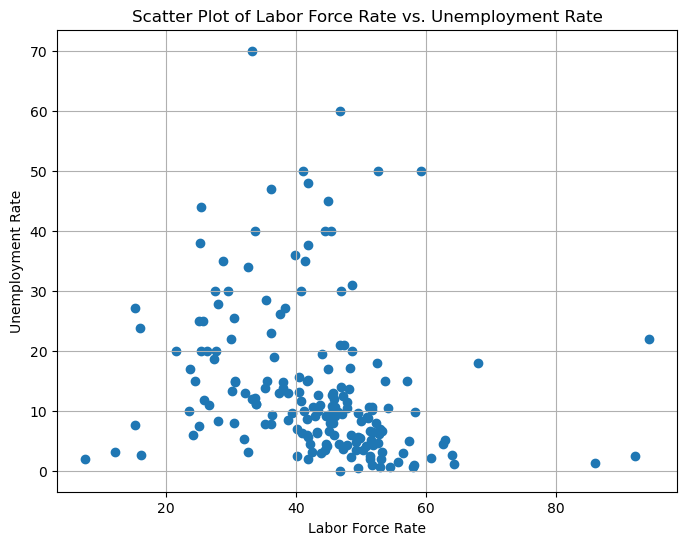

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(countries_clean['Labor force rate'], countries_clean['Unemployment rate(%)'])
plt.title('Scatter Plot of Labor Force Rate vs. Unemployment Rate')
plt.xlabel('Labor Force Rate')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

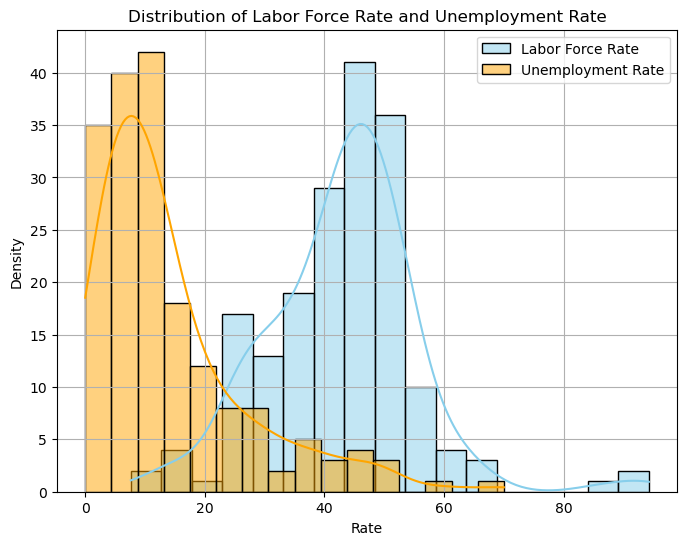

In [73]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(countries_clean['Labor force rate'], kde=True, color='skyblue', label='Labor Force Rate')
sns.histplot(countries_clean['Unemployment rate(%)'], kde=True, color='orange', label='Unemployment Rate')
plt.title('Distribution of Labor Force Rate and Unemployment Rate')
plt.xlabel('Rate')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

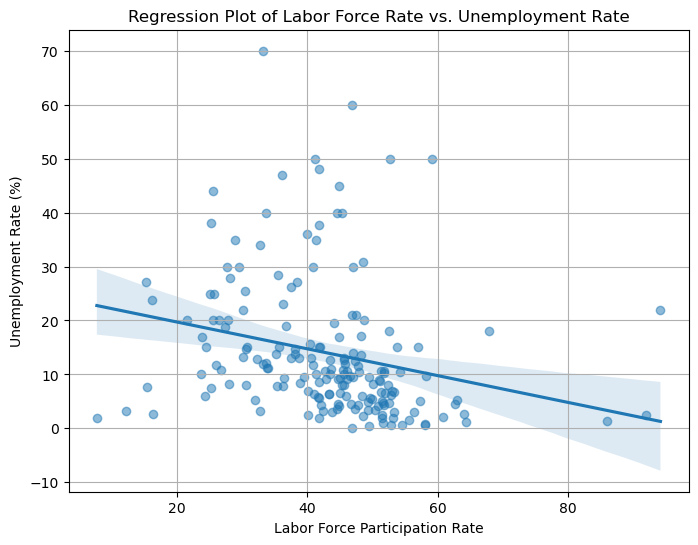

In [74]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x='Labor force rate', y='Unemployment rate(%)', data=countries_clean, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Labor Force Rate vs. Unemployment Rate')
plt.xlabel('Labor Force Participation Rate')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()